In [1]:
!pip install opendatasets --quiet

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

True

In [3]:
import opendatasets as od

In [4]:
import pandas as pd
import numpy as np

In [6]:
od.download('https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading sms-spam-collection-dataset.zip to .\sms-spam-collection-dataset


100%|██████████| 211k/211k [00:00<00:00, 935kB/s]

In [7]:
import os
os.listdir('./sms-spam-collection-dataset/')
dir='./sms-spam-collection-dataset/'
spam_df=pd.read_csv(dir+'spam.csv',encoding="ISO-8859-1")
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
spam_df=spam_df[["v1","v2"]]
spam_df.rename(columns={'v1':'Lables','v2':'Message'},inplace=True)
spam_df.head(),spam_df.shape

(  Lables                                            Message
 0    ham  Go until jurong point, crazy.. Available only ...
 1    ham                      Ok lar... Joking wif u oni...
 2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3    ham  U dun say so early hor... U c already then say...
 4    ham  Nah I don't think he goes to usf, he lives aro...,
 (5572, 2))

In [9]:
y=pd.get_dummies(spam_df[['Lables']])
Y=y.iloc[:,1]
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Lables_spam, Length: 5572, dtype: uint8


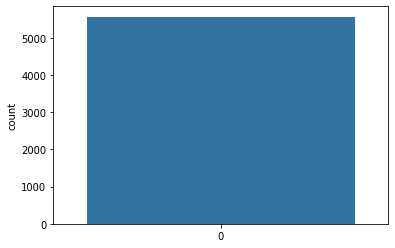

In [10]:
import seaborn as sns
sns.countplot(Y);

#We are having an imbalanced dataset

In [11]:
message=spam_df.iloc[:,1]
message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

# Cleaning the text

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [13]:
corpus=[]
ps=PorterStemmer()
lem=WordNetLemmatizer()
for i in range(len(message)):
  text=re.sub('[^a-zA-Z]',' ',message[i])
  text=text.lower()
  text=text.split()
  text=[lem.lemmatize(word) for word in text if not word in stopwords.words('english')]
  text=' '.join(text)
  corpus.append(text)
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [15]:
X=tf.fit_transform(corpus).toarray()

# Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.15,shuffle=True)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
model=MultinomialNB().fit(x_train,y_train)

In [20]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [21]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [22]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[727,   1],
       [ 27,  81]], dtype=int64)

<AxesSubplot: >

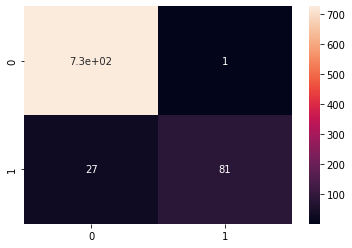

In [23]:
sns.heatmap(cm,annot=True)

In [24]:
acc=accuracy_score(y_test,y_pred)
acc

0.9665071770334929

In [25]:
y_test[:10]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_1568\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


3245    0
944     0
1044    1
2484    0
812     1
2973    0
2991    0
2942    0
230     0
1181    0
Name: Lables_spam, dtype: uint8

In [26]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

Let's see which we got wrong and right

In [27]:
print(message[1044])
print(message[812])

We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16


In [28]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       728
           1       0.99      0.75      0.85       108

    accuracy                           0.97       836
   macro avg       0.98      0.87      0.92       836
weighted avg       0.97      0.97      0.96       836



In [29]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [32]:
file='tfidf.pkl'
pickle.dump(tf,open(file,'wb'))